In [204]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from IPython.display import FileLink
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [205]:
#We read in the weather and Energy Data here
weather = pd.read_csv('weather_data.csv')
energy = pd.read_csv('energy_data.csv')

In [206]:
#The weather and energy data frames here have several columns and features. Each has a date
#or time column, so we need to parse that using pd.to_date_time.

energy['Date & Time'] = pd.to_datetime(energy['Date & Time'])
energy.head(10)

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
5,2014-01-01 02:30:00,0.397099,0.0,0.397099,0.000442,0.126960,0.005415,0.000054,0.003627,0.003749,0.004891,0.002133,0.000024,0.007187,0.063814,0.003813,0.004398,0.106717
6,2014-01-01 03:00:00,0.590319,0.0,0.590319,0.001858,0.420358,0.005509,0.000043,0.003562,0.003541,0.005007,0.002072,0.000197,0.007208,0.065277,0.003008,0.004008,0.006479
7,2014-01-01 03:30:00,0.538266,0.0,0.538266,0.001071,0.257654,0.005507,0.000020,0.003582,0.003549,0.004837,0.002136,0.000047,0.007198,0.063142,0.004142,0.004565,0.121088
8,2014-01-01 04:00:00,0.189187,0.0,0.189187,0.000056,0.009462,0.005302,0.000141,0.003708,0.003837,0.004858,0.002086,0.000034,0.007107,0.070109,0.004202,0.004704,0.011131
9,2014-01-01 04:30:00,0.653232,0.0,0.653232,0.001663,0.387637,0.005552,0.000033,0.003532,0.003463,0.004878,0.002112,0.000118,0.007203,0.064450,0.003669,0.004194,0.104737


In [207]:
#Energy data is given in 30 min increments, which is not what we want. Here we consider the
#time values, and combine rows into corresponding hourly usage.
energy.set_index('Date & Time', inplace=True)
energy_hourly = energy.resample('H').sum()
energy_hourly.reset_index(inplace=True)

In [208]:
#Here we do the same thing, except we combine it into daily data.
energy_hourly.set_index('Date & Time',inplace = True)
energy_daily = energy.resample('D').sum()
energy_daily.reset_index(inplace= True)

In [209]:
#The energy time is given in hourly increment in unix epoch time, so we convert it accordingly
# to the units
weather['time'] = pd.to_datetime(weather['time'],unit='s')



In [210]:
# And create the weather DataFrame giving summed up data values in daily increments

weather.set_index('time',inplace = True)
weather_daily = weather.resample('D').mean()
weather_daily.reset_index(inplace=True)



C:\Users\jerry\AppData\Local\Temp\ipykernel_3088\2016932265.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_daily = weather.resample('D').mean()


In [211]:
weather_daily.head(10)
energy_hourly.head(10)

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.961211,0.0,0.961211,0.001592,0.373869,0.010858,0.000169,0.014689,0.007348,0.009724,0.004269,0.000116,0.014380,0.128364,0.007888,0.009178,0.138597
2014-01-01 01:00:00,1.296874,0.0,1.296874,0.003591,0.828642,0.011060,0.000104,0.007027,0.006960,0.009840,0.004119,0.000291,0.014433,0.130141,0.006926,0.008658,0.131399
2014-01-01 02:00:00,0.594908,0.0,0.594908,0.000472,0.144112,0.010717,0.000173,0.007321,0.007614,0.009767,0.004220,0.000077,0.014319,0.126266,0.007728,0.008805,0.123515
2014-01-01 03:00:00,1.128584,0.0,1.128584,0.002928,0.678013,0.011016,0.000063,0.007144,0.007091,0.009844,0.004207,0.000243,0.014406,0.128419,0.007149,0.008573,0.127567
2014-01-01 04:00:00,0.842418,0.0,0.842418,0.001718,0.397099,0.010854,0.000174,0.007240,0.007300,0.009736,0.004198,0.000152,0.014311,0.134559,0.007871,0.008898,0.115868
2014-01-01 05:00:00,1.131186,0.0,1.131186,0.002428,0.582686,0.010999,0.000072,0.007133,0.007178,0.009823,0.004254,0.000171,0.014544,0.127594,0.007249,0.008466,0.234848
2014-01-01 06:00:00,0.809791,0.0,0.809791,0.001114,0.255856,0.026174,0.000100,0.007308,0.007538,0.009890,0.004302,0.000142,0.014452,0.125722,0.008316,0.009329,0.221419
2014-01-01 07:00:00,1.943427,0.0,1.943427,0.001954,0.373962,0.032512,0.000080,0.007409,0.007419,0.009984,0.004261,0.000318,0.014359,0.133752,0.008117,0.225673,0.131483
2014-01-01 08:00:00,3.140389,0.0,3.140389,0.002627,0.423454,0.061661,0.000116,0.051536,0.007407,0.009992,0.004481,0.000351,0.014447,0.132365,0.007035,0.703996,0.297703


In [212]:
#We rename the time column in weather data so that it matches the name in the 
#energy data, so we can merge it successfully.

weather_daily=weather_daily.rename(columns={'time':'Date & Time'})

In [213]:
#And merge the weather and energy date into our dataset

weather_daily.head(10)
df_daily=pd.merge(weather_daily,energy_daily,on='Date & Time')

In [214]:
#For linear regression, we want to use weather data to try to predict total energy usage.
#Hence, we create the target dataframe consisting of the use [kW] column in question as our target,
# and create features dataframe which consist of all the data we are going to use, which is the
#data frame dropping all values associated with energy.

target = df_daily[['Date & Time','use [kW]']]
features = df_daily.drop(['gen [kW]','Grid [kW]','AC [kW]','Furnace [kW]','Cellar Lights [kW]','Washer [kW]','First Floor lights [kW]','Utility Rm + Basement Bath [kW]'
      ,'Garage outlets [kW]','MBed + KBed outlets [kW]','Dryer + egauge [kW]','Panel GFI (central vac) [kW]','Home Office (R) [kW]','Dining room (R) [kW]','Microwave (R) [kW]','Fridge (R) [kW]','use [kW]'],axis=1)
features.head(10)

,Date & Time,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417
5,2014-01-06,39.084167,0.900417,4.062917,1003.460833,7.355833,1.000000,167.458333,0.026258,36.336250,0.460000
6,2014-01-07,13.882917,0.481250,9.784167,1009.740000,14.787083,0.014348,284.500000,0.000000,-2.297917,0.000000
7,2014-01-08,9.087917,0.504167,9.998750,1028.058333,7.298333,0.000833,228.750000,0.000000,-5.790417,0.000000
8,2014-01-09,18.169583,0.570833,9.967083,1033.970000,4.840833,0.016957,255.208333,0.000000,5.136667,0.000000
9,2014-01-10,20.532500,0.843750,7.059167,1033.154167,2.637500,0.160769,191.125000,0.001350,16.584583,0.054583


In [215]:
#Here, we split data into training and test data, where training data is data from months
#1-11, and we are trying to predict the energy usage in Decemeber.
# We have to drop Date and Time while training, since we are trying to use weather as a direct
# prediction, not date. 
# We create the training data frame of all values from january to november, and then separate them
# into independent variable data set and dependent variable data set.


training = features[features['Date & Time'].dt.month<12]
training_data = training.drop(['Date & Time'],axis=1)
training_target = target[target['Date & Time'].dt.month<12]
training_target = training_target.drop(['Date & Time'],axis=1)
test = features[features['Date & Time'].dt.month==12]
test_data = test.drop(['Date & Time'],axis = 1)

test_target = target[target['Date & Time'].dt.month==12]
test_target =test_target.drop(['Date & Time'],axis=1)

In [216]:
#The first approach we try here is Linear Regression.
# We train the model on our training dataset here, and
#also predict the december energy usage using the testing
# data set.

# We measure how effective linear regression is by calculating the RMSE
# and display it below.

linReg = LinearRegression()
linReg.fit(training_data,training_target)
prediction = linReg.predict(test_data)

prediction = np.squeeze(prediction)
mse =mean_squared_error(prediction,test_target)
print(np.sqrt(mse))

# We see that RMSE is relatively high, showing that Linear Regression perhaps wasn't optimal
# considering how theres many weather variables in play, therefore, 

8.740566311138176


In [217]:
# Then download our predictions into a csv

predictions=pd.DataFrame({'Date': test['Date & Time'],'Predicted: ':prediction})
predictions.to_csv('cse351_hw2_xiao_ruijie_115297528_linear_regression.csv',index=False)
link = FileLink('cse351_hw2_xiao_ruijie_115297528_linear_regression.csv')
display(link)

C:\Users\jerry\Documents\CS\CSE351\HW2\cse351_hw2_xiao_ruijie_115297528_linear_regression.csv

In [218]:
#Next, lets try to predict whether a day has high temperature or not based on other
#classifying attributes given in the dataset.

#We divide data into training and test, where again, training is months 1-11 and test is 
#month 12. 

weather_training = weather_daily[weather_daily['Date & Time'].dt.month<12]

#Additionally, we have to classify each value based on the temperature as either high or low
#We use the simple threshold high -> temp >=35, low -> temp < 35
weather_training['Class']=np.where(weather_training['temperature']>=35,'1','0')
weather_x = weather_training.drop(['Class','temperature','Date & Time'],axis=1)
weather_y=weather_training['Class']


#We then set up the Logistic Regression model.
logReg=LogisticRegression()
logReg.fit(weather_x,weather_y)

C:\Users\jerry\AppData\Local\Temp\ipykernel_3088\230039324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_training['Class']=np.where(weather_training['temperature']>=35,'1','0')
C:\Users\jerry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [219]:
#We also set up the test data set as follows.
weather_test =weather_daily[weather_daily['Date & Time'].dt.month==12]
weather_test['Class']=np.where(weather_test['temperature']>=35,'1','0')
weather_target = weather_test['Class']
weather_test1=weather_test.drop(['Class','temperature','Date & Time'],axis = 1)
predict = logReg.predict(weather_test1)
#and print out the predicted value based on our fitted model.
print(predict)

['1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0']


C:\Users\jerry\AppData\Local\Temp\ipykernel_3088\1361967276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_test['Class']=np.where(weather_test['temperature']>=35,'1','0')


In [220]:
#We then calculate the f_score to see how well our model did. In this case, we get an
#F score of 0.631578947, which shows that our model does decently well, but not great.
f1 = f1_score(predict,weather_target,pos_label='1')
print(f1)

0.631578947368421


In [221]:
# Downloading the prediction.

predictions = pd.DataFrame({'Date':weather_test['Date & Time'],'Classification':predict})
predictions.to_csv('cse351_hw2_xiao_ruijie_115297528_logistic_regression.csv')
link = FileLink('cse351_hw2_xiao_ruijie_115297528_logistic_regression.csv')
display(link)


C:\Users\jerry\Documents\CS\CSE351\HW2\cse351_hw2_xiao_ruijie_115297528_logistic_regression.csv

In [222]:
# Finally, lets try to analyze the trend of usage 
# of certain appliances depending on whether or not it is day or night
#  Here we try to analyze power usage of AC and the Washer

#We extract the necessary columns and have its corresponding datestamps too,
#Then divide it into day and night dataframe with the threshhold day means between 6:00 and 19:00
# and night means from 19:00 to 6:00 AM


target = energy_hourly[['AC [kW]','Washer [kW]']]
target['Day/Night']=np.where((target.index.hour>=6)&(target.index.hour<19),'Day','Night')

day_data=target[target['Day/Night']=='Day']
night_data = target[target['Day/Night']=='Night']


C:\Users\jerry\AppData\Local\Temp\ipykernel_3088\1060454556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Day/Night']=np.where((target.index.hour>=6)&(target.index.hour<19),'Day','Night')


Text(0.5, 1.0, 'Power Usage of AC Throughout the Year(Day Time)')

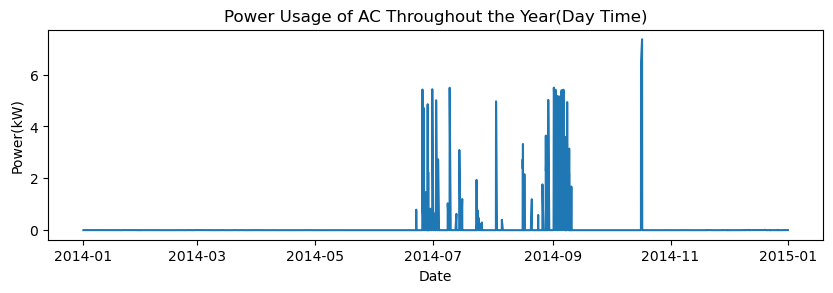

In [223]:
#We first plot the AC in daytime over the year

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(day_data.index,day_data['AC [kW]'],label='AC')

plt.xlabel('Date')
plt.ylabel('Power(kW)')
plt.title("Power Usage of AC Throughout the Year(Day Time)")

Text(0.5, 1.0, 'Power Usage of AC throught the Year(Night Time)')

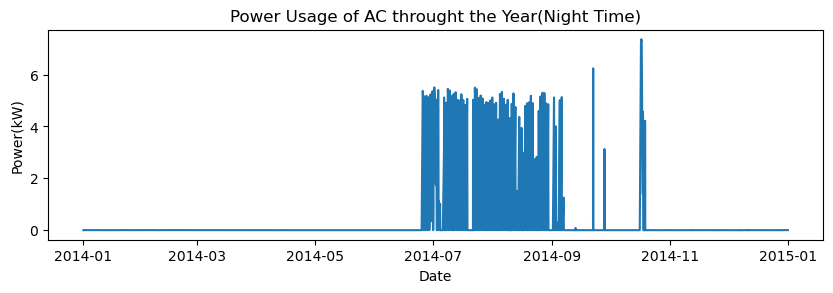

In [224]:
#Then AC through the year over night time
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(night_data.index,night_data['AC [kW]'])
plt.xlabel('Date')
plt.ylabel('Power(kW)')
plt.title("Power Usage of AC throught the Year(Night Time)")

Text(0.5, 1.0, 'Power Usage of Washer through the Year (Day Time)')

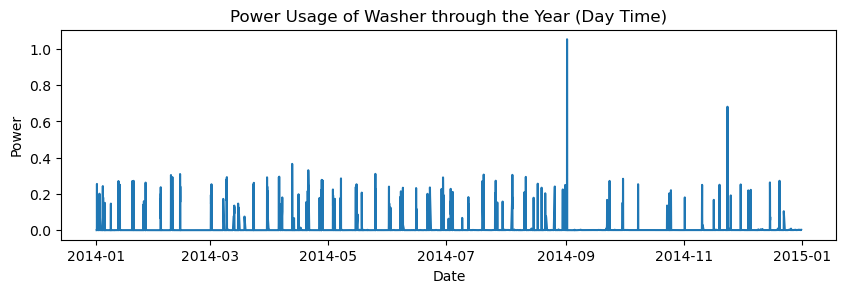

In [225]:
#Washer through the year in Day time

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(day_data.index,day_data['Washer [kW]'])
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Power Usage of Washer through the Year (Day Time)")

Text(0.5, 1.0, 'Power Usage of Washer through the Year (Night Time)')

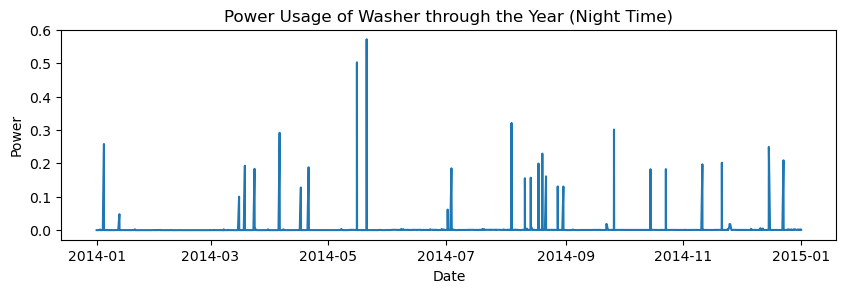

In [226]:
#Washer through the year over night time.
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(night_data.index,night_data['Washer [kW]'])
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Power Usage of Washer through the Year (Night Time)")

In [227]:
#Here we can clearly observe some trends: 
#Through the months from late June to early September, we see that that is primarily when AC is 
#being used, which is obviously due to the summer heatComparatively speaking from the density of the graphs, 
#we see that AC is being used much more often in the time period that is considered nighttime by our metric. 
#Part of the reason that could explain this trend is that night time is often when people come back to home 
#from work or so, and sleep in the night. Therefore, generally AC is used much more to maintain coolness
#during those times. 

#We also observe that throughout the day, in August AC isn't used as much, as compared to July and September
# as opposed to the nights, where AC is pretty much constantly used throughout those 3 months.

# For the washers, we see that the usage follows a regular weekly trend, with some gaps in between.
# This is probably due to the routine observed by the users of these appliances. Night time usage
# of washing machines are more scarce than daytime usages too, showing that mostly laundry is done
# in the day.